In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
train=pd.read_csv('./data/Train_SU63ISt.csv')
test=pd.read_csv('./data/Test_0qrQsBZ.csv')
train_original=train.copy()
test_original=test.copy()

In [3]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
print(train.columns)
print(train.dtypes)
print(train.shape)
print(test.shape)

Index(['ID', 'Datetime', 'Count'], dtype='object')
ID           int64
Datetime    object
Count        int64
dtype: object
(18288, 3)
(5112, 2)


In [5]:
#feature extraction
train['Datetime']=pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')

In [6]:
train['Datetime'].head()

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [7]:
for df in (train,test):
    df['year']=df['Datetime'].dt.year
    df['month']=df['Datetime'].dt.month
    df['day']=df['Datetime'].dt.day
    df['hour']=df['Datetime'].dt.hour

In [8]:
train['Day of week']=train['Datetime'].dt.dayofweek

In [9]:
train.head()

,ID,Datetime,Count,year,month,day,hour,Day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [10]:
#train.loc[train['Day of week']==5,'weekend']=1

def returnweekend(row):
    if row['Day of week']==5 or row['Day of week']==6:
        return 1
    else:
        return 0
train['weekend']=train.apply(returnweekend,axis=1)

/home/user/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


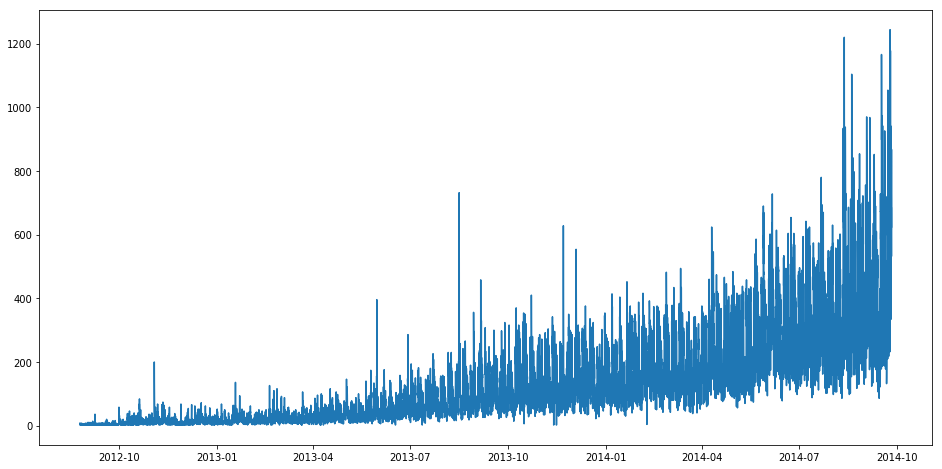

In [11]:
#plot
train.index=train['Datetime']
ts=train['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='passenger count')

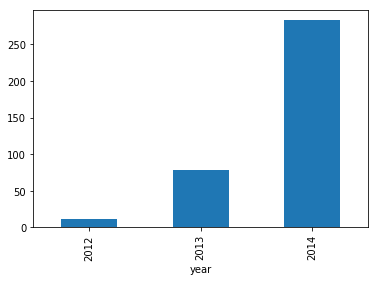

In [12]:
#testing hypothesis: traffic increases as year goes by
train.groupby('year')['Count'].mean().plot(kind='bar')

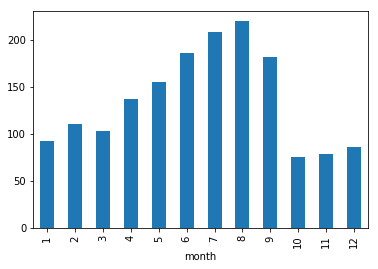

In [13]:
#monthly plots
train.groupby('month')['Count'].mean().plot(kind='bar')

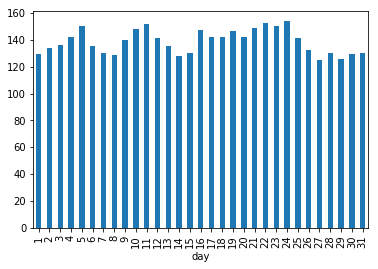

In [14]:
#monthly plots
train.groupby('day')['Count'].mean().plot(kind='bar')

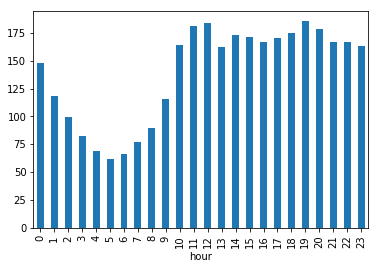

In [15]:
#hourly plots
train.groupby('hour')['Count'].mean().plot(kind='bar')

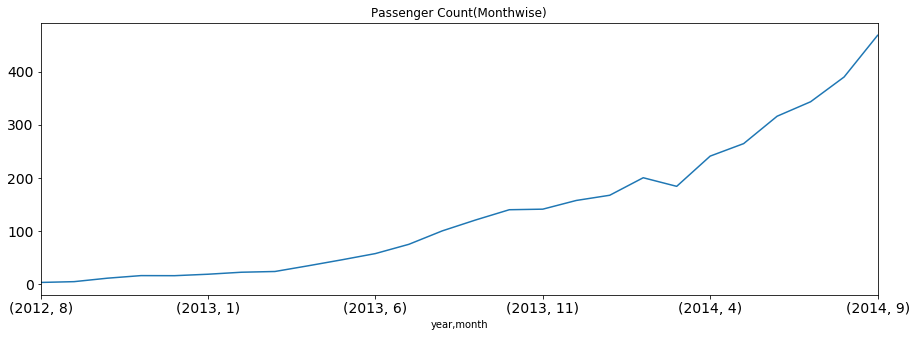

In [16]:
#monthly mean of each year
train.groupby(['year','month'])['Count'].mean().plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

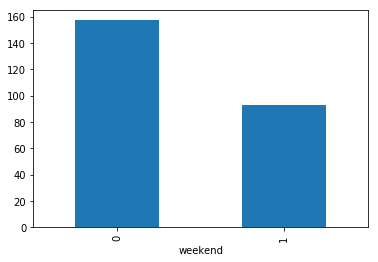

In [17]:
#traffic during weekends
train.groupby('weekend')['Count'].mean().plot(kind='bar')

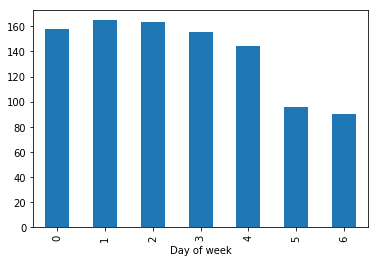

In [18]:
#traffic during day of week
train.groupby('Day of week')['Count'].mean().plot(kind='bar')

In [19]:
train['Timestamp']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train['Timestamp']
#hourly time series
hourly=train.resample('H').mean()
#Daily time series
daily=train.resample('D').mean()
#weekly time series
weekly=train.resample('W').mean()
#monthly time series
monthly=train.resample('M').mean()

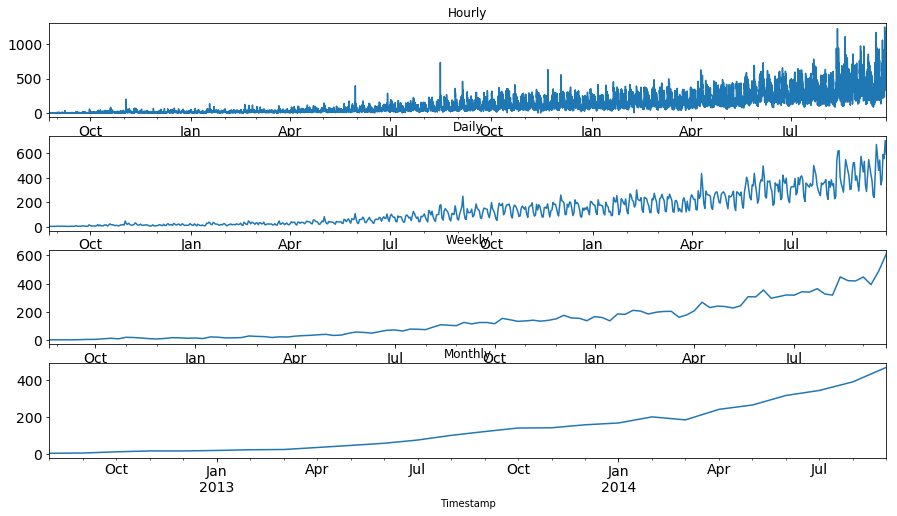

In [20]:
#lets look at timeseries
plt.subplot(4,1,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14)
plt.subplot(4,1,2)
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14)
plt.subplot(4,1,3)
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14)
plt.subplot(4,1,4)
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14)

In [21]:
#we will work with daily time series
test['Timestamp'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test['Timestamp']
# Converting to daily mean 
test = test.resample('D').mean() 

train['Timestamp'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']
# Converting to daily mean 
train = train.resample('D').mean()

In [22]:
train.head()

,ID,Count,year,month,day,hour,Day of week,weekend
Timestamp,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [23]:
train.tail()

,ID,Count,year,month,day,hour,Day of week,weekend
Timestamp,,,,,,,,
2014-09-21,18179.5,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,18203.5,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,18227.5,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0
2014-09-24,18251.5,702.333333,2014.0,9.0,24.0,11.5,2.0,0.0
2014-09-25,18275.5,589.666667,2014.0,9.0,25.0,11.5,3.0,0.0


In [24]:
#we have data from aug 2012 to sep 2014 using last 3 months for validation
Train=train.loc['2012-08-25':'2014-06-24',:]
Valid=train.loc['2014-06-25':'2014-09-25',:]

In [25]:
Train.tail()

,ID,Count,year,month,day,hour,Day of week,weekend
Timestamp,,,,,,,,
2014-06-20,15947.5,379.916667,2014.0,6.0,20.0,11.5,4.0,0.0
2014-06-21,15971.5,220.083333,2014.0,6.0,21.0,11.5,5.0,1.0
2014-06-22,15995.5,230.833333,2014.0,6.0,22.0,11.5,6.0,1.0
2014-06-23,16019.5,419.416667,2014.0,6.0,23.0,11.5,0.0,0.0
2014-06-24,16043.5,372.166667,2014.0,6.0,24.0,11.5,1.0,0.0


In [26]:
Valid.head()

,ID,Count,year,month,day,hour,Day of week,weekend
Timestamp,,,,,,,,
2014-06-25,16067.5,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0
2014-06-26,16091.5,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0
2014-06-27,16115.5,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0
2014-06-28,16139.5,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0
2014-06-29,16163.5,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0


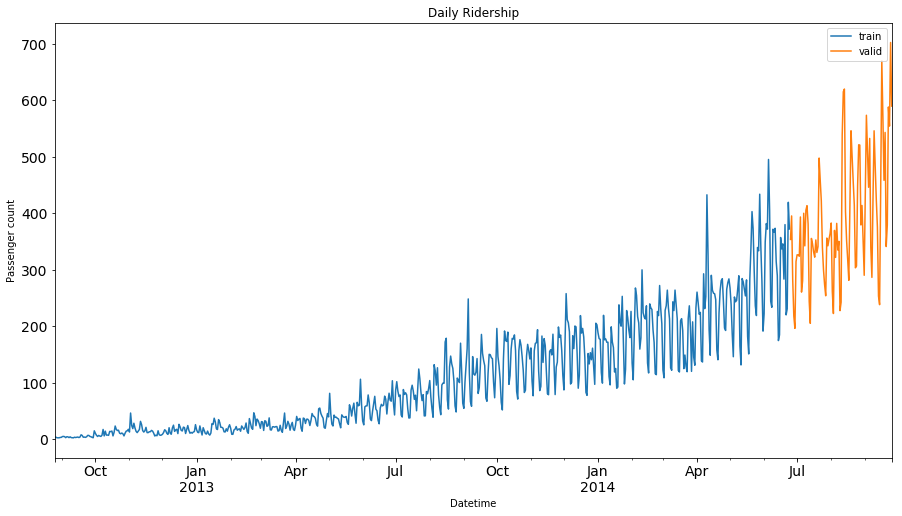

In [27]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
Valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best') 
plt.show()

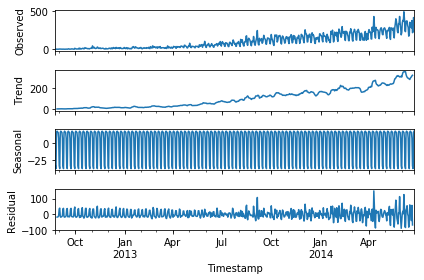

In [28]:

def checkDecomposition(series):
    import statsmodels.api as sm 
    sm.tsa.seasonal_decompose(Train.Count).plot() 
    result = sm.tsa.stattools.adfuller(train.Count) 
    plt.show()
checkDecomposition(Train.Count)

In [29]:
#modelling technique
#naive approach
#moving average
#simple exponential smoothing
#holts linear trend model

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


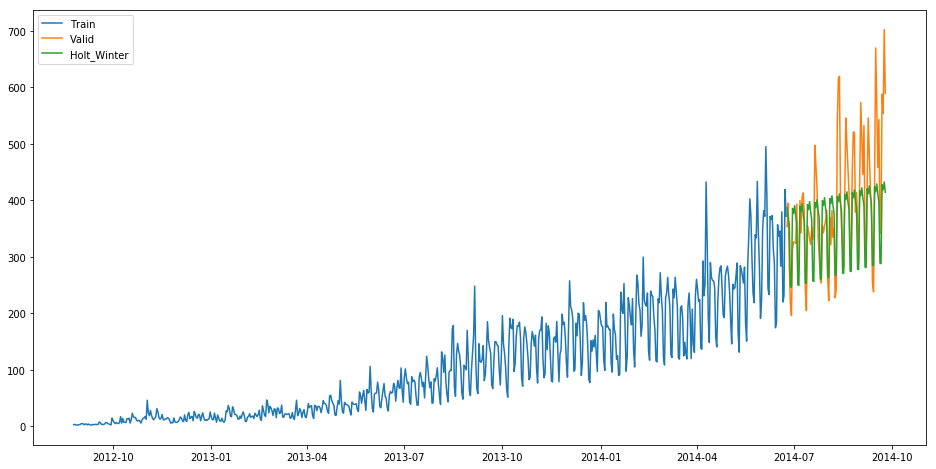

82.37684477328179


In [30]:
#holts winter model
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
from math import sqrt
from sklearn.metrics import mean_squared_error
fit1=ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add').fit()
Valid['predictions']=fit1.forecast(len(Valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(Valid['predictions'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()
rms = sqrt(mean_squared_error(Valid.Count, Valid['predictions'])); print(rms)






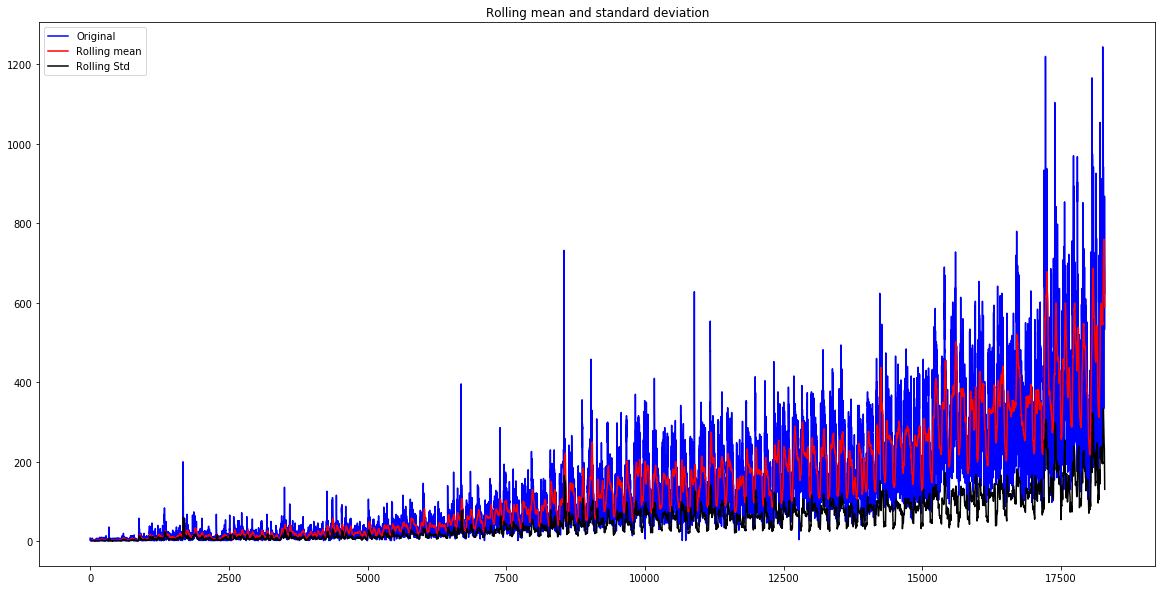

<Figure size 1440x1440 with 0 Axes>

results of Dickey fuller test:
(-4.456560536856828, 0.00023540466467664961, 45, 18242, {'1%': -3.430708525404171, '5%': -2.861698454786869, '10%': -2.5668543412994906}, 181026.8337109476)
Test Statistic             -4.456561
p-value                     0.000235
#lags used                 45.000000
no of observations      18242.000000
Critical Value (1%)        -3.430709
Critical Value (5%)        -2.861698
Critical Value (10%)       -2.566854
dtype: float64


In [31]:
#arima stands for auto regression integrated moving average
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determine rolling stats
    df=pd.DataFrame(timeseries)
    rolmean=df.rolling(24).mean()
    rolstd=df.rolling(24).std()
    fig=plt.figure(figsize=(20,10))
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    fig=plt.figure(figsize=(20,20))
    plt.show(fig,block=False)
    
    #perform dickey-fuller test:
    print('results of Dickey fuller test:')
    dftest=adfuller(timeseries,autolag='AIC')
    print(dftest)
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','no of observations'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    
test_stationarity(train_original['Count'])


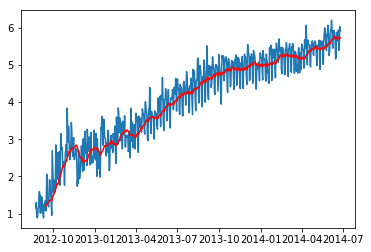

In [32]:
#since test statistic is smaller than critical value we can assume data is stationary
#but we can make time series more stationary by removing trend
Train_log=np.log(Train['Count'])
Valid_log=np.log(Valid['Count'])
moving_avg=Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg,color='red')
plt.show()

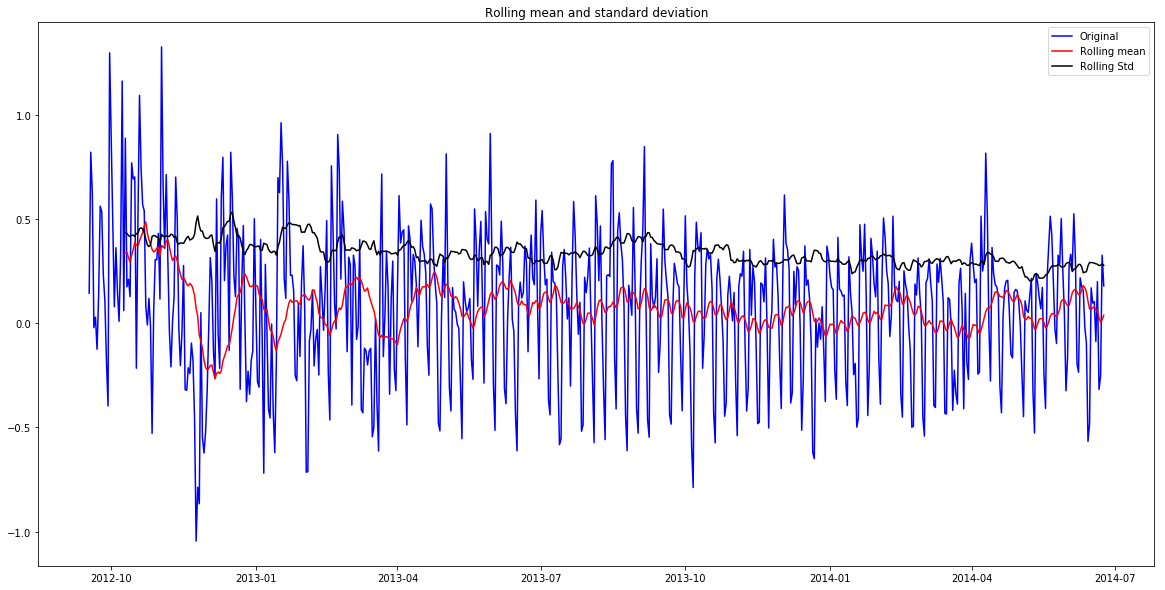

<Figure size 1440x1440 with 0 Axes>

results of Dickey fuller test:
(-5.861645522775964, 3.3994222693861414e-07, 20, 625, {'1%': -3.440856177517568, '5%': -2.86617548304384, '10%': -2.56923863104}, 16.2381378419052)
Test Statistic         -5.861646e+00
p-value                 3.399422e-07
#lags used              2.000000e+01
no of observations      6.250000e+02
Critical Value (1%)    -3.440856e+00
Critical Value (5%)    -2.866175e+00
Critical Value (10%)   -2.569239e+00
dtype: float64


In [33]:
#we can remove this increasing trend 
train_log_moving_avg_diff=Train_log-moving_avg
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

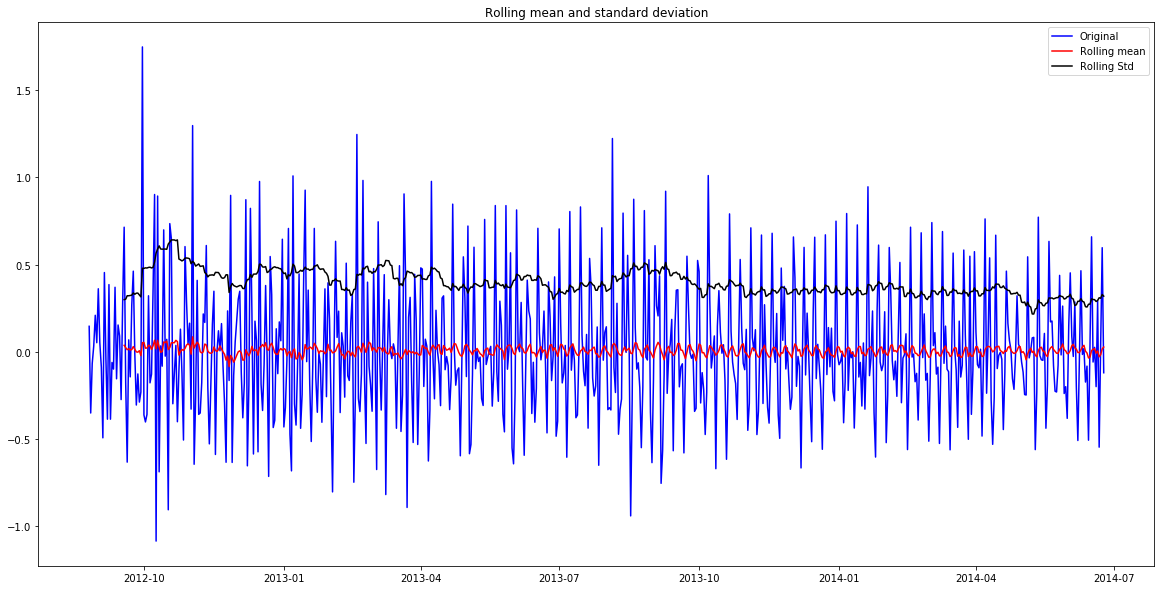

<Figure size 1440x1440 with 0 Axes>

results of Dickey fuller test:
(-8.237567849678866, 5.834049398271797e-13, 19, 648, {'1%': -3.4404817800778034, '5%': -2.866010569916275, '10%': -2.569150763698369}, 115.79917596602104)
Test Statistic         -8.237568e+00
p-value                 5.834049e-13
#lags used              1.900000e+01
no of observations      6.480000e+02
Critical Value (1%)    -3.440482e+00
Critical Value (5%)    -2.866011e+00
Critical Value (10%)   -2.569151e+00
dtype: float64


In [34]:
#we can stabilize the mean of timeseries which is also requirement
#differencing
train_log_diff=Train_log-Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

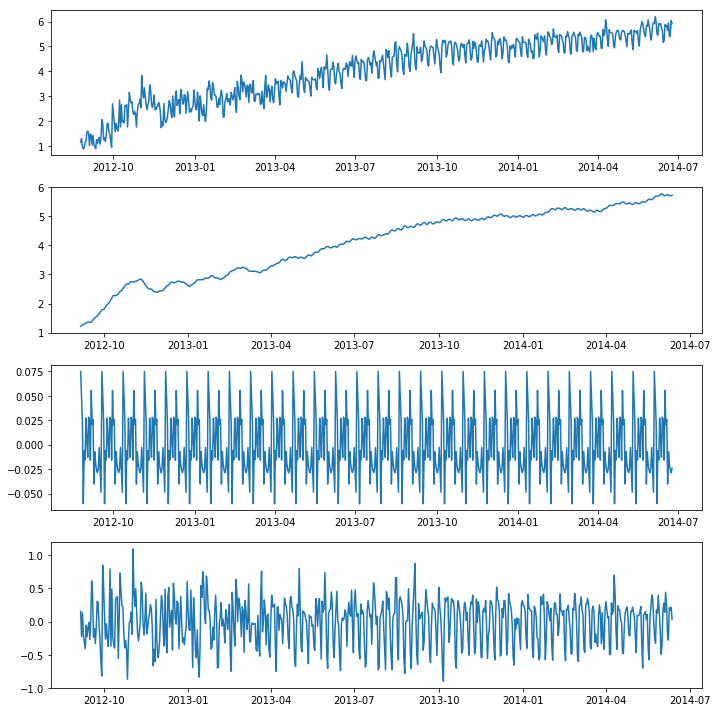

In [35]:
#we can make time series more stationary by removing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(pd.DataFrame(Train_log),freq=24)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 
plt.figure(figsize=(10,10))
plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.tight_layout() 
plt.show()

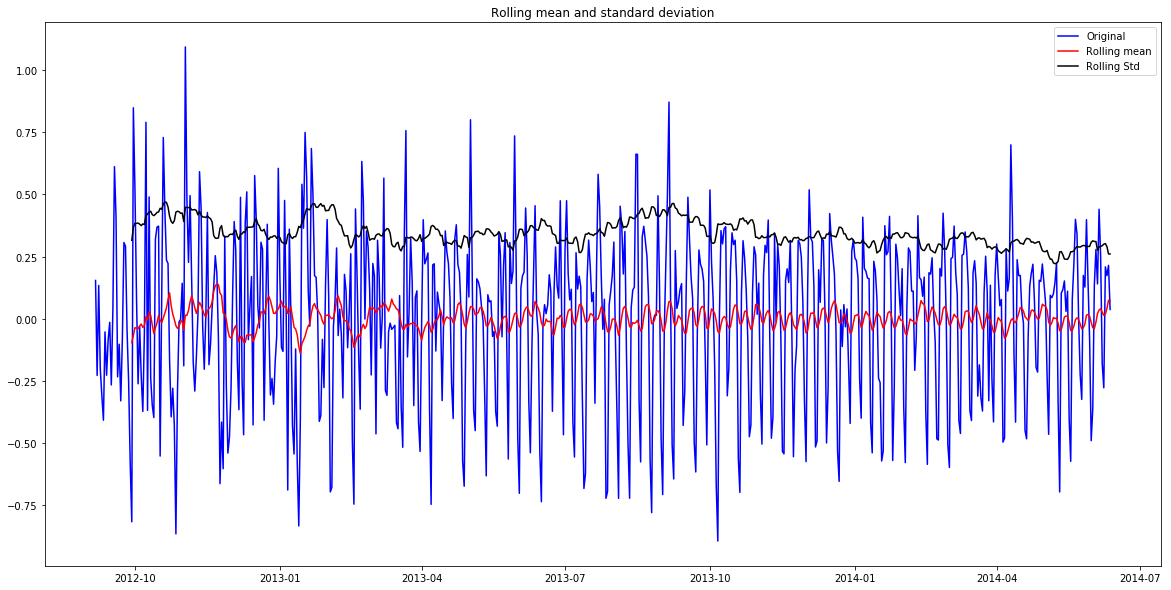

<Figure size 1440x1440 with 0 Axes>

results of Dickey fuller test:
(-7.8220960394083505, 6.628320880210901e-12, 20, 624, {'1%': -3.440873084361836, '5%': -2.866182929627575, '10%': -2.5692425987220577}, -31.688840304840596)
Test Statistic         -7.822096e+00
p-value                 6.628321e-12
#lags used              2.000000e+01
no of observations      6.240000e+02
Critical Value (1%)    -3.440873e+00
Critical Value (5%)    -2.866183e+00
Critical Value (10%)   -2.569243e+00
dtype: float64


In [36]:
#seasonality shows constant trend in counter so fine
#checking stationary for residuals

train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose.Count)

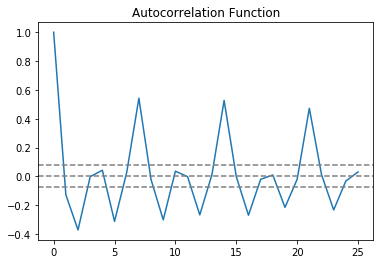

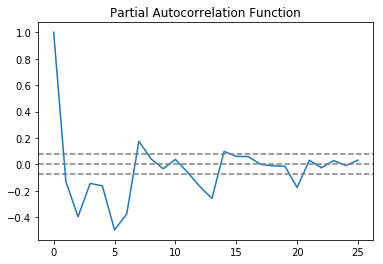

In [37]:
#acf and pacf plots
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(train_log_diff.dropna(),nlags=25)
lag_pacf=pacf(train_log_diff.dropna(),nlags=25,method='ols')
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function') 
plt.show()

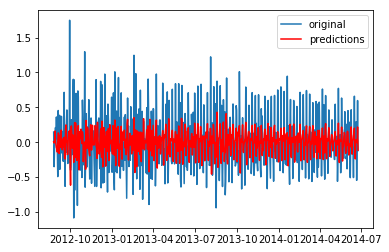

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


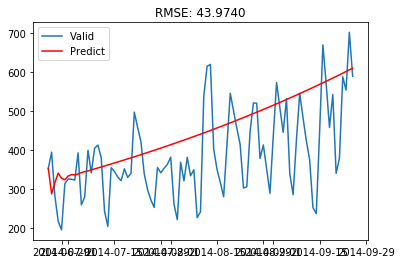

In [38]:
#p is lag value where pacf crosses upper confidence interval for 1st time and p=1 here
#q is lag value where acf crosses upper confidence interval for 1st time and q=1 here
#creating AR model
from statsmodels.tsa.arima_model import ARIMA
def createArimaModel(p,d,q):
    model=ARIMA(Train_log,order=(p,d,q))#order is p,d,q
    results_AR=model.fit(disp=-1)
    #predictions
    plt.plot(train_log_diff.dropna(), label='original') 
    plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
    plt.legend(loc='best') 
    plt.show()
    #validation curve and change scale to original scale
    AR_predict=results_AR.predict(start='2014-06-25',end='2014-09-25')
    #adding cum sum because in differencing step we subtracted with next value
    AR_predict=AR_predict.cumsum().shift().fillna(0) 
    #adding 1st value to prediction
    AR_predict1=pd.Series(np.ones(Valid.shape[0]) * np.log(Valid['Count'])[0], index = Valid.index) 
    AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
    #taking antilog
    AR_predict = np.exp(AR_predict1)

    plt.plot(Valid['Count'], label = "Valid") 
    plt.plot(AR_predict, color = 'red', label = "Predict") 
    plt.legend(loc= 'best') 
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, Valid['Count']))/Valid.shape[0]))
    plt.show()
createArimaModel(2,1,0)#here q value is 0

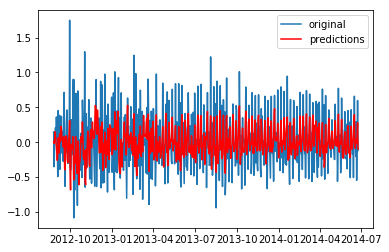

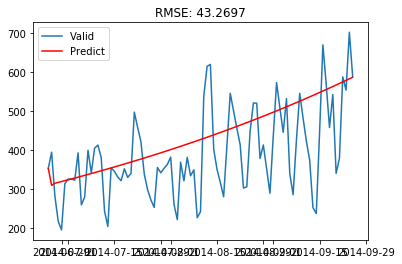

In [39]:
#MA model
createArimaModel(0,1,2)#here p value is 0

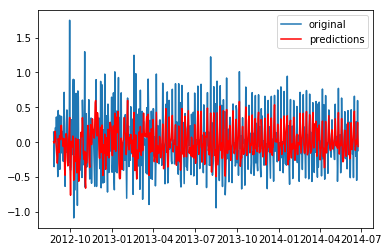

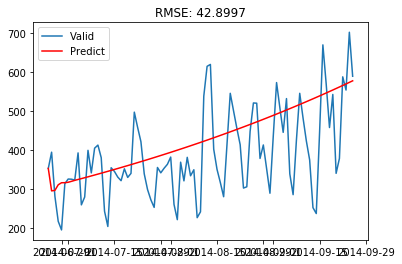

In [40]:
#combined model
createArimaModel(2,1,2)

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


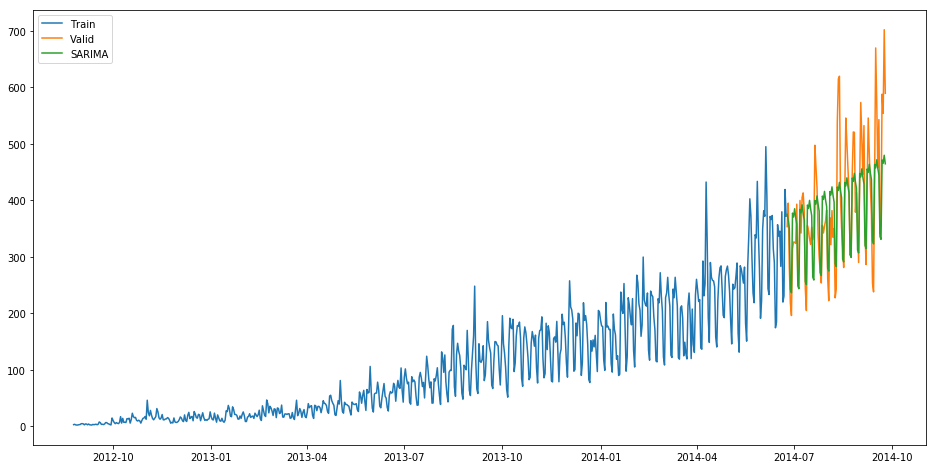

70.01276136809706


In [41]:
#let us create SARIMAX model
import statsmodels.api as sm
fit1=sm.tsa.statespace.SARIMAX(Train.Count,order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
Valid['SARIMAX']=fit1.predict(start='2014-06-25',end='2014-09-25',dynamic=True)
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(Valid['SARIMAX'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()
rms = sqrt(mean_squared_error(Valid.Count, Valid.SARIMAX)) 
print(rms)